<a href="https://colab.research.google.com/github/mostafa-sadeghi/amirali_eslami/blob/main/vgg16OnCfar10_Last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import tensorflow.keras as tk
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential

In [47]:
(x_train, y_train), (x_test, y_test) = tk.datasets.cifar10.load_data()


In [48]:
x_train.shape

(50000, 32, 32, 3)

In [49]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [50]:
y_train.shape

(50000, 1)

In [51]:
classes = np.unique(y_train)

In [52]:
len(classes)

10

In [53]:
x_train[22].shape

(32, 32, 3)

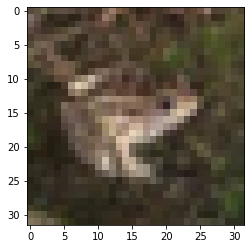

In [54]:
plt.imshow(x_train[22]);

Normalization

In [55]:
x_train = x_train/255

In [ ]:
x_train

In [25]:
y_train[0].shape

(1,)

In [57]:
x_test = x_test/255

/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


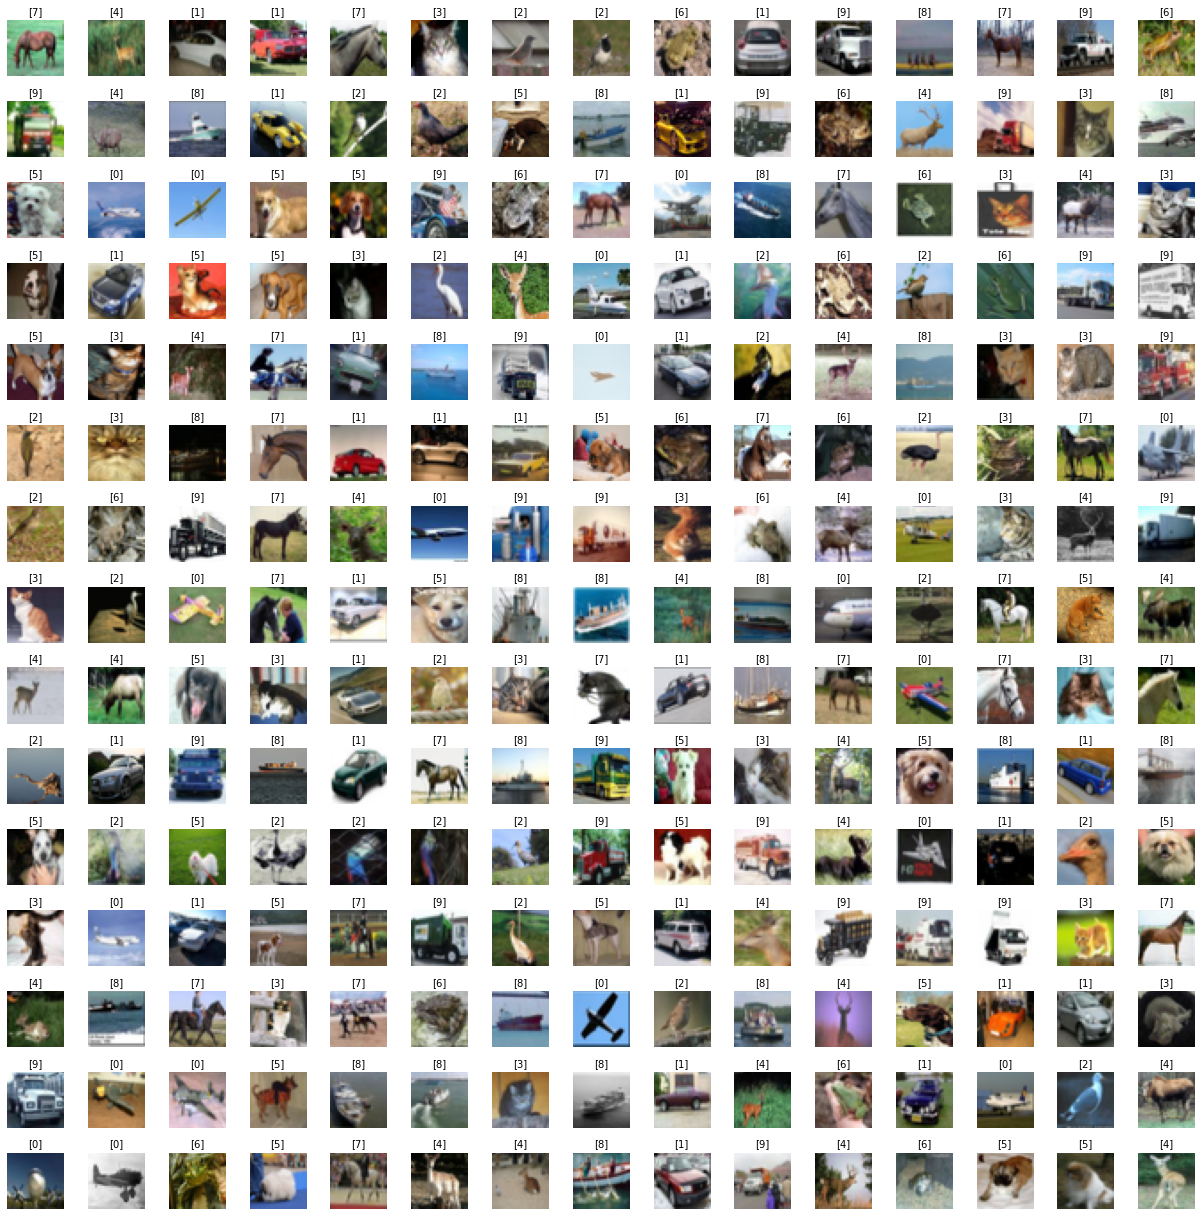

In [58]:
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(w_grid,l_grid, figsize=(17,17))
axes = axes.ravel()
n_training = len(x_train)
for i in np.arange(0, w_grid * l_grid):
  index = np.random.randint(0, n_training)
 
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index], fontsize=10)
  axes[i].axis('off')
fig.tight_layout()

In [59]:
vgg16_model = VGG16(weights='imagenet',
                    include_top=False, 
                    classes=10,
                    input_shape=(32,32,3)# input: 32x32 images with 3 channels -> (32, 32, 3) tensors.
                   )

In [60]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [61]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
model.add(Flatten())
model.add(Dense(512, activation='relu', name='hidden1'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu', name='hidden2'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax', name='predictions'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)        

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=12345)

In [63]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=100, 
                    validation_data=(x_validate, y_validate))

Epoch 1/100
1250/1250 [==============================] - 37s 30ms/step - loss: 0.5993 - accuracy: 0.8063 - val_loss: 0.8149 - val_accuracy: 0.7452
Epoch 2/100
1250/1250 [==============================] - 36s 29ms/step - loss: 0.5447 - accuracy: 0.8251 - val_loss: 0.7638 - val_accuracy: 0.7606
Epoch 3/100
1250/1250 [==============================] - 36s 29ms/step - loss: 0.5311 - accuracy: 0.8307 - val_loss: 0.9228 - val_accuracy: 0.7138
Epoch 4/100
1250/1250 [==============================] - 36s 29ms/step - loss: 0.5024 - accuracy: 0.8426 - val_loss: 0.7978 - val_accuracy: 0.7554
Epoch 5/100
1250/1250 [==============================] - 36s 29ms/step - loss: 0.4680 - accuracy: 0.8521 - val_loss: 0.9004 - val_accuracy: 0.7505
Epoch 6/100
1250/1250 [==============================] - 36s 29ms/step - loss: 0.4573 - accuracy: 0.8566 - val_loss: 0.9192 - val_accuracy: 0.7430
Epoch 7/100
1250/1250 [==============================] - 36s 29ms/step - loss: 0.4255 - accuracy: 0.8664 - val_loss: 0

In [66]:
evaluation = model.evaluate(x_test,y_test)
print(f"Test accuracy: {evaluation[1]*100:.2f}%")

313/313 [==============================] - 3s 8ms/step - loss: 0.8535 - accuracy: 0.7301
Test accuracy: 73.01%


In [ ]:
predicted_classes = model.predict(x_test)
len(predicted_classes)

In [ ]:
print(predicted_classes[0])
y_test[0]

In [ ]:
np.argmax(predicted_classes[0])

In [ ]:
y_test[0]

In [ ]:
fig, axes = plt.subplots(5,5,figsize=(12,12))
axes = axes.ravel()
print(axes.shape)
x_test[0].shape
for i in np.arange(0,25):
  axes[i].imshow(x_test[i].reshape(28,28))
  axes[i].set_title(f"Prediction Class = {np.argmax(predicted_classes[i]):.1f}\nTrue class = {y_test[i]}")


  axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)